# **Desafio da Semana 14**

Para o desafio semanal, escolhi realizar o merge dos seguintes datasets: 'olist_order_items_dataset', 'olist_products_dataset' e 'olist_sellers_dataset'. Após gerar um dataframe final com as informações contidas nos datasets citados, tenho como objetivo realizar as seguintes análises:

- *Qual a categoria de produto com mais vendas?*
- *Para cada região dos vendedores, qual a categoria de produto mais vendida?*
- *Qual a variação do frete de acordo com a localidade do vendedor?*
- *Qual a variação da média de preço dos produtos vendidos de acordo com a região do vendedor?*

## Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura dos datasets

In [20]:
df_itens_pedidos = pd.read_csv('olist_order_items_dataset.csv')
df_itens_pedidos

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [88]:
df_produtos = pd.read_csv('olist_products_dataset.csv')
df_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [107]:
df_vendedores = pd.read_csv('olist_sellers_dataset.csv')
df_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


## Limpeza dos dados

### Itens dos pedidos

In [21]:
#Visualizando as informações do dataframe

df_itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
#Confirmando a ausência de valores nulos

df_itens_pedidos.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
#Filtrando somente as colunas que serão relevantes para a análise que desejamos realizar

columns_drop_items = ['order_item_id', 'shipping_limit_date']
df_itens_pedidos = df_itens_pedidos.drop(columns_drop_items, axis=1)

In [87]:
#Revisualizando o dataframe, já tratado

df_itens_pedidos

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72


### Produtos

In [89]:
#Visualizando as informações do dataframe

df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [90]:
#Filtrando somente as colunas que serão relevantes para a análise que desejamos realizar

columns_drop_products = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
df_produtos = df_produtos.drop(columns_drop_products, axis=1)

In [91]:
#Checando a quantidade de produtos sem categoria registrada

df_produtos.isnull().sum()

product_id                 0
product_category_name    610
dtype: int64

In [92]:
#Atribuindo um valor ao campo 'product_category_name' para os produtos sem categoria registrada

df_produtos['product_category_name'] = df_produtos['product_category_name'].fillna('Outros')

In [93]:
#Rechecando a quantidade de produtos sem categoria registrada, agora que atribuímos um valor aos produtos sem categorias

df_produtos.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [94]:
#Checando todas as variações de categorias dos produtos

df_produtos['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'Outros', 'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa'

In [95]:
#Diminuindo a quantidade de categorias, atribuindo as anteriores a macrocategorias

df_produtos.loc[df_produtos['product_category_name'].isin(['perfumaria', 'beleza_saude']), 'product_category_name'] = 'Beleza'
df_produtos.loc[df_produtos['product_category_name'].isin(['artes', 'musica', 'audio', 'artes_e_artesanato', 'cine_foto', 'cds_dvds_musicais', 'dvds_blu_ray', 'esporte_lazer', 'instrumentos_musicais', 'cool_stuff', 'brinquedos']), 'product_category_name'] = 'Arte & Entretenimento'
df_produtos.loc[df_produtos['product_category_name'].isin(['bebidas', 'la_cuisine', 'alimentos_bebidas', 'alimentos']), 'product_category_name'] = 'Alimentos'
df_produtos.loc[df_produtos['product_category_name'].isin(['utilidades_domesticas', 'moveis_decoracao', 'cama_mesa_banho', 'moveis_escritorio', 'casa_construcao', 'moveis_sala', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'casa_conforto', 'moveis_quarto', 'casa_conforto_2', 'moveis_colchao_e_estofado']), 'product_category_name'] = 'Casa'
df_produtos.loc[df_produtos['product_category_name'].isin(['eletrodomesticos', 'climatizacao', 'eletrodomesticos_2', 'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos']), 'product_category_name'] = 'Eletrodomésticos'
df_produtos.loc[df_produtos['product_category_name'].isin(['automotivo']), 'product_category_name'] = 'Automotivo'
df_produtos.loc[df_produtos['product_category_name'].isin(['construcao_ferramentas_seguranca', 'construcao_ferramentas_construcao', 'ferramentas_jardim', 'sinalizacao_e_seguranca', 'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim']), 'product_category_name'] = 'Ferramentas'
df_produtos.loc[df_produtos['product_category_name'].isin(['eletronicos', 'pcs', 'relogios_presentes', 'eletroportateis', 'consoles_games', 'tablets_impressao_imagem', 'pc_gamer']), 'product_category_name'] = 'Eletrônicos & Afins'
df_produtos.loc[df_produtos['product_category_name'].isin(['telefonia', 'telefonia_fixa']), 'product_category_name'] = 'Telefonia'
df_produtos.loc[df_produtos['product_category_name'].isin(['flores']), 'product_category_name'] = 'Flores'
df_produtos.loc[df_produtos['product_category_name'].isin(['bebes', 'fraldas_higiene']), 'product_category_name'] = 'Bebês'
df_produtos.loc[df_produtos['product_category_name'].isin(['fashion_calcados', 'fashion_bolsas_e_acessorios', 'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_esporte', 'fashion_roupa_infanto_juvenil']), 'product_category_name'] = 'Fashion'
df_produtos.loc[df_produtos['product_category_name'].isin(['malas_acessorios', 'informatica_acessorios']), 'product_category_name'] = 'Acessórios Diversos'
df_produtos.loc[df_produtos['product_category_name'].isin(['papelaria']), 'product_category_name'] = 'Papelaria'
df_produtos.loc[df_produtos['product_category_name'].isin(['pet_shop']), 'product_category_name'] = 'Pets'
df_produtos.loc[df_produtos['product_category_name'].isin(['agro_industria_e_comercio', 'industria_comercio_e_negocios', 'market_place', 'seguros_e_servicos']), 'product_category_name'] = 'Indústria & Comércio'
df_produtos.loc[df_produtos['product_category_name'].isin(['livros_interesse_geral', 'livros_tecnicos', 'livros_importados']), 'product_category_name'] = 'Livros'
df_produtos.loc[df_produtos['product_category_name'].isin(['artigos_de_festas', 'artigos_de_natal']), 'product_category_name'] = 'Artigos'

In [96]:
#Revisitando agora as variações de categorias dos produtos

df_produtos['product_category_name'].unique()

array(['Beleza', 'Arte & Entretenimento', 'Bebês', 'Casa',
       'Eletrodomésticos', 'Ferramentas', 'Acessórios Diversos',
       'Automotivo', 'Eletrônicos & Afins', 'Fashion', 'Telefonia',
       'Papelaria', 'Pets', 'Indústria & Comércio', 'Outros', 'Livros',
       'Artigos', 'Alimentos', 'Flores'], dtype=object)

In [113]:
#Revisualizando o dataframe, já tratado

df_produtos

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Beleza
1,3aa071139cb16b67ca9e5dea641aaa2f,Arte & Entretenimento
2,96bd76ec8810374ed1b65e291975717f,Arte & Entretenimento
3,cef67bcfe19066a932b7673e239eb23d,Bebês
4,9dc1a7de274444849c219cff195d0b71,Casa
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Casa
32947,bf4538d88321d0fd4412a93c974510e6,Ferramentas
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Casa
32949,83808703fc0706a22e264b9d75f04a2e,Acessórios Diversos


### Vendedores

In [108]:
#Visualizando as informações do dataframe

df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [109]:
#Confirmando a ausência de valores nulos

df_vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [110]:
#Filtrando somente as colunas que serão relevantes para a análise que desejamos realizar

columns_drop_sellers = ['seller_zip_code_prefix', 'seller_city']
df_vendedores = df_vendedores.drop(columns_drop_sellers, axis=1)

In [111]:
#Criando uma nova coluna que indica qual a região do vendedor

df_vendedores.loc[df_vendedores['seller_state'].isin(['MT', 'MS', 'GO', 'DF']), 'seller_region'] = 'Centro-Oeste'
df_vendedores.loc[df_vendedores['seller_state'].isin(['AM', 'PA', 'AC', 'RO', 'RR', 'AP', 'TO']), 'seller_region'] = 'Norte'
df_vendedores.loc[df_vendedores['seller_state'].isin(['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']), 'seller_region'] = 'Nordeste'
df_vendedores.loc[df_vendedores['seller_state'].isin(['RJ', 'SP', 'ES', 'MG']), 'seller_region'] = 'Sudeste'
df_vendedores.loc[df_vendedores['seller_state'].isin(['RS', 'SC', 'PR']), 'seller_region'] = 'Sul'

In [114]:
#Revisualizando o dataframe, já tratado

df_vendedores

,seller_id,seller_state,seller_region
0,3442f8959a84dea7ee197c632cb2df15,SP,Sudeste
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP,Sudeste
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ,Sudeste
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP,Sudeste
4,51a04a8a6bdcb23deccc82b0b80742cf,SP,Sudeste
...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,PR,Sul
3091,f8201cab383e484733266d1906e2fdfa,SC,Sul
3092,74871d19219c7d518d0090283e03c137,SP,Sudeste
3093,e603cf3fec55f8697c9059638d6c8eb5,RS,Sul


## Junção dos dataframes

In [115]:
#Juntando os dados de 'df_itens_pedidos' e 'df_produtos' através da intersecção do product_id, gerando um novo dataframe

df_desafio = pd.merge(df_itens_pedidos, df_produtos, on=['product_id'])
df_desafio

,order_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,Arte & Entretenimento
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,Arte & Entretenimento
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,Arte & Entretenimento
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,Arte & Entretenimento
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,Arte & Entretenimento
...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,Ferramentas
112646,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,Casa
112647,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,Eletrônicos & Afins
112648,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,Arte & Entretenimento


In [116]:
#Juntando os dados de 'df_desafio' e 'df_vendedores' através da intersecção do seller_id, atualizando o dataframe 'df_desafio'

df_desafio = pd.merge(df_desafio, df_vendedores, on='seller_id')
df_desafio

,order_id,product_id,seller_id,price,freight_value,product_category_name,seller_state,seller_region
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,Arte & Entretenimento,SP,Sudeste
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,Arte & Entretenimento,SP,Sudeste
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,Arte & Entretenimento,SP,Sudeste
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,Arte & Entretenimento,SP,Sudeste
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,Arte & Entretenimento,SP,Sudeste
...,...,...,...,...,...,...,...,...
112645,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.9,16.14,Casa,PR,Sul
112646,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.0,16.21,Eletrônicos & Afins,PR,Sul
112647,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21,Eletrônicos & Afins,PR,Sul
112648,ff701a7c869ad21de22a6994237c8a00,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,27.9,14.44,Alimentos,SP,Sudeste


## Exportação da base

In [164]:
df_desafio.to_csv('maria_eduarda_mello.csv', index=False)

## Análise dos dados

### **Qual a categoria de produto com mais vendas?**

In [117]:
df_desafio.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68
product_category_name,112650,19,Casa,30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,112650,23,SP,80342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_region,112650,5,Sudeste,94359,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df_desafio['product_category_name'].value_counts(normalize=True)

product_category_name
Casa                     0.267226
Arte & Entretenimento    0.159956
Beleza                   0.116192
Eletrônicos & Afins      0.096485
Acessórios Diversos      0.079174
Ferramentas              0.056050
Telefonia                0.042690
Automotivo               0.037594
Bebês                    0.027554
Fashion                  0.023453
Papelaria                0.022344
Pets                     0.017284
Outros                   0.014230
Eletrodomésticos         0.012401
Alimentos                0.010484
Livros                   0.007812
Indústria & Comércio     0.007040
Artigos                  0.001740
Flores                   0.000293
Name: proportion, dtype: float64

Ao analisar o *.describe()* do dataframe, ou ao fazer um *.value_counts()* da coluna de categorias, já é possível indicar que a categoria de produto com mais vendas registradas é *Casa*, porém, vamos criar um gráfico que nos mostre visualmente essas proporções.

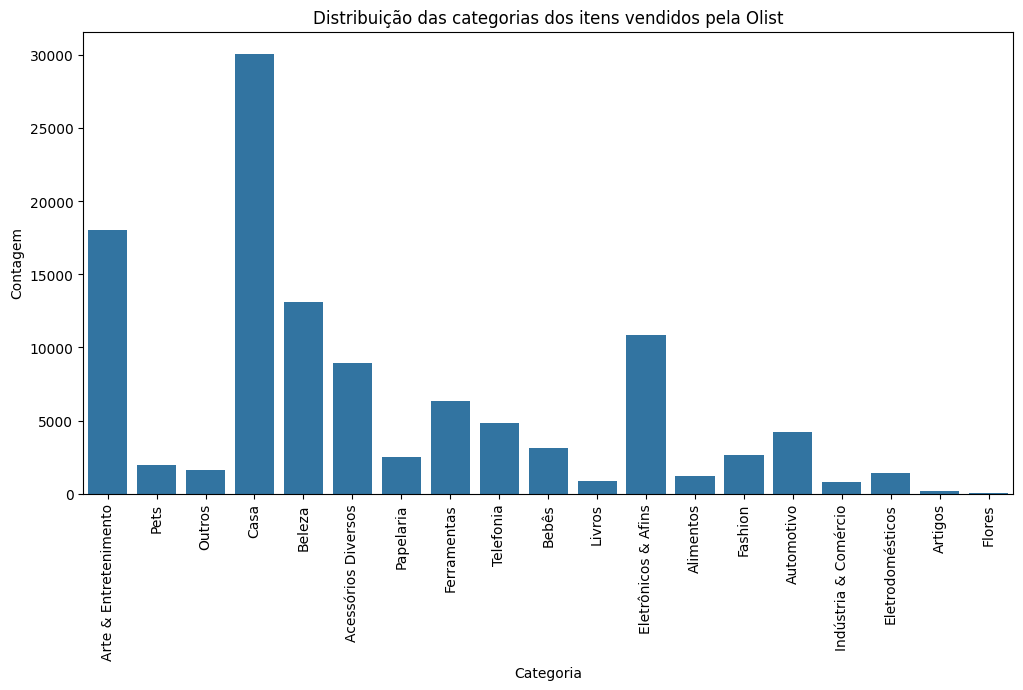

In [122]:
#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_desafio,
              x = 'product_category_name')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das categorias dos itens vendidos pela Olist')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Rotacionando os textos do eixo x para melhor visualização
plt.xticks(rotation=90)

#Visualizando o gráfico
plt.show()

### **Para cada região de vendedores, qual a categoria de produto mais vendida?**

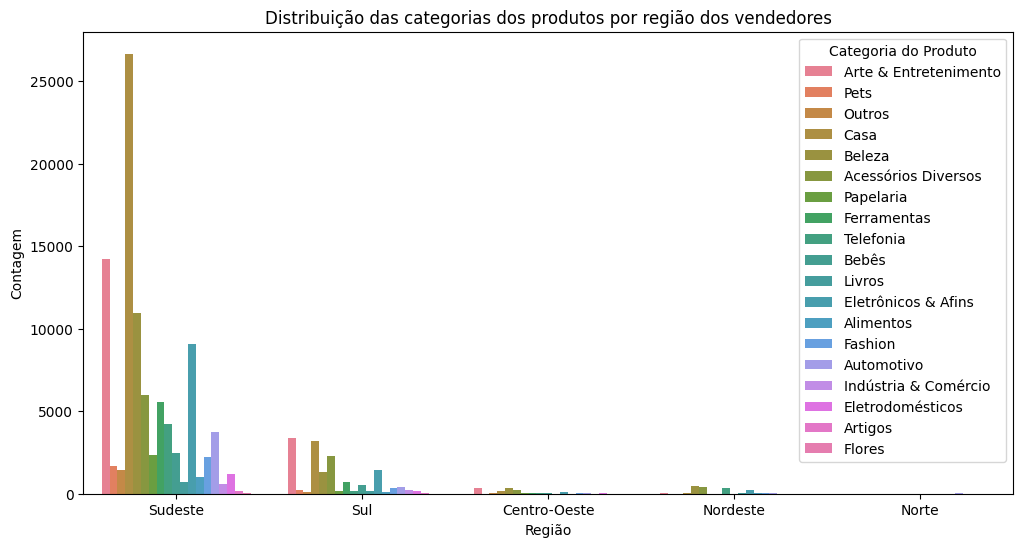

In [133]:
#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_desafio,
              x = 'seller_region',
              hue = 'product_category_name')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das categorias dos produtos por região dos vendedores')
plt.xlabel('Região')
plt.ylabel('Contagem')

#Definindo o texto da legenda
plt.legend(title='Categoria do Produto')

#Visualizando o gráfico
plt.show()

Bom, claramente a diferença de quantidade de vendas entre as regiões dificultou a visualização dos dados. Dessa forma, é interessante visualizar região por região para entender o percentual de vendas de cada categoria naquela área.

#### Sudeste

Categoria de produtos mais vendida: **Casa**

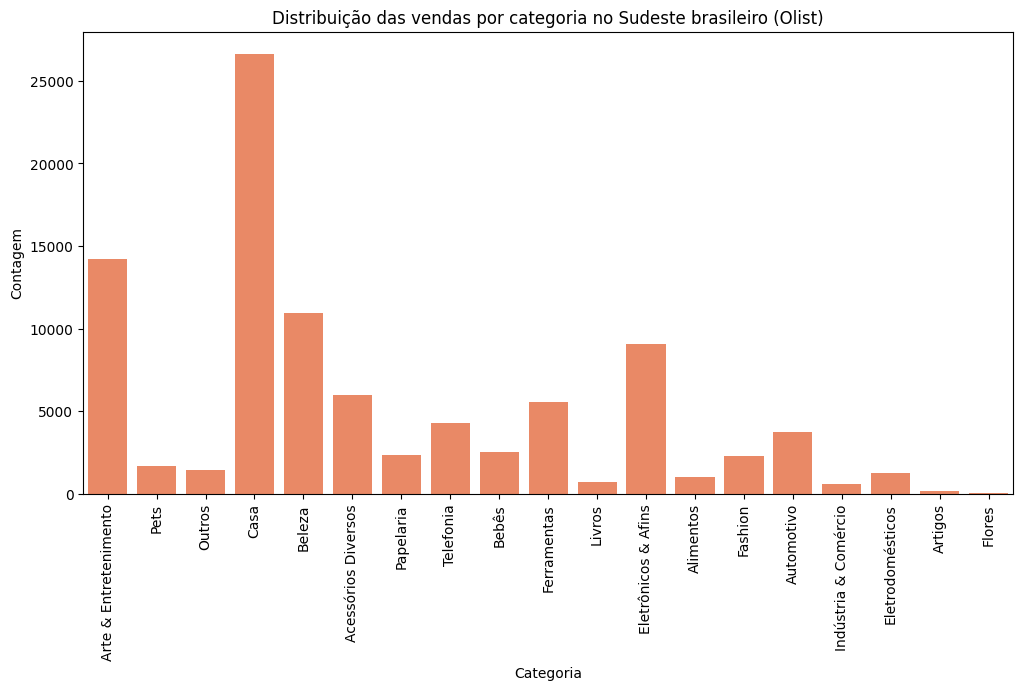

In [150]:
#Limitando o dataframe a itens vendidos somente por vendedores sudestinos
df_sudeste = df_desafio[df_desafio['seller_region'] == 'Sudeste']

#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_sudeste,
              x = 'product_category_name',
              color = 'coral')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das vendas por categoria no Sudeste brasileiro (Olist)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Rotacionando os textos do eixo x para melhor visualização
plt.xticks(rotation=90)

#Visualizando o gráfico
plt.show()

#### Sul

Categoria de produtos mais vendida: **Entretenimento**

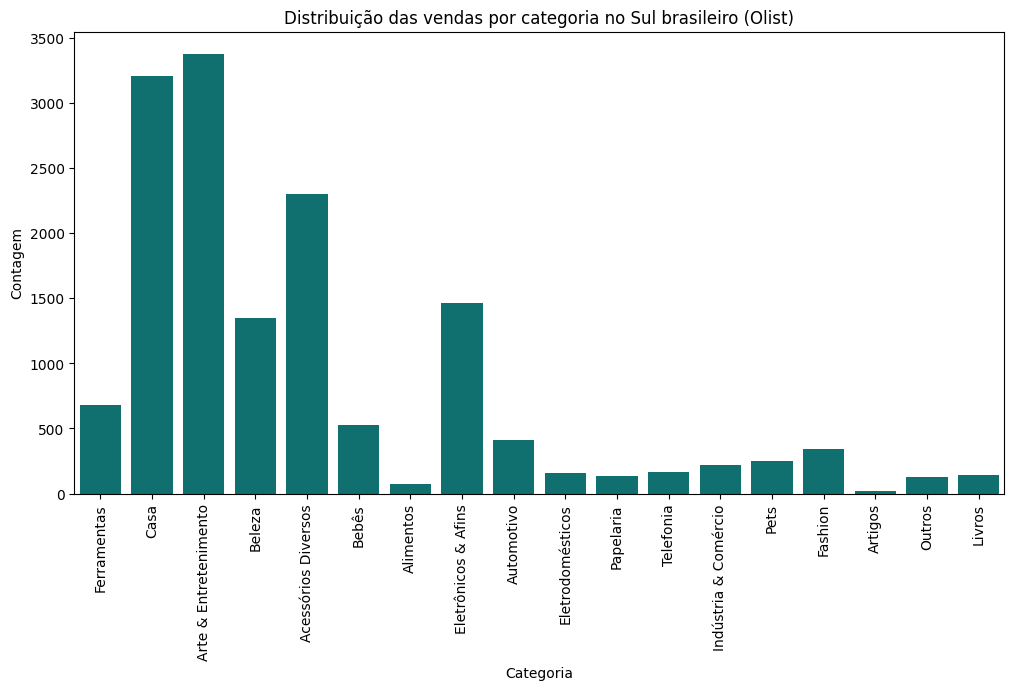

In [151]:
#Limitando o dataframe a itens vendidos somente por vendedores sulistas
df_sul = df_desafio[df_desafio['seller_region'] == 'Sul']

#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_sul,
              x = 'product_category_name',
              color = 'teal')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das vendas por categoria no Sul brasileiro (Olist)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Rotacionando os textos do eixo x para melhor visualização
plt.xticks(rotation=90)

#Visualizando o gráfico
plt.show()

#### Centro-Oeste

Categoria de produtos mais vendida: **Beleza**

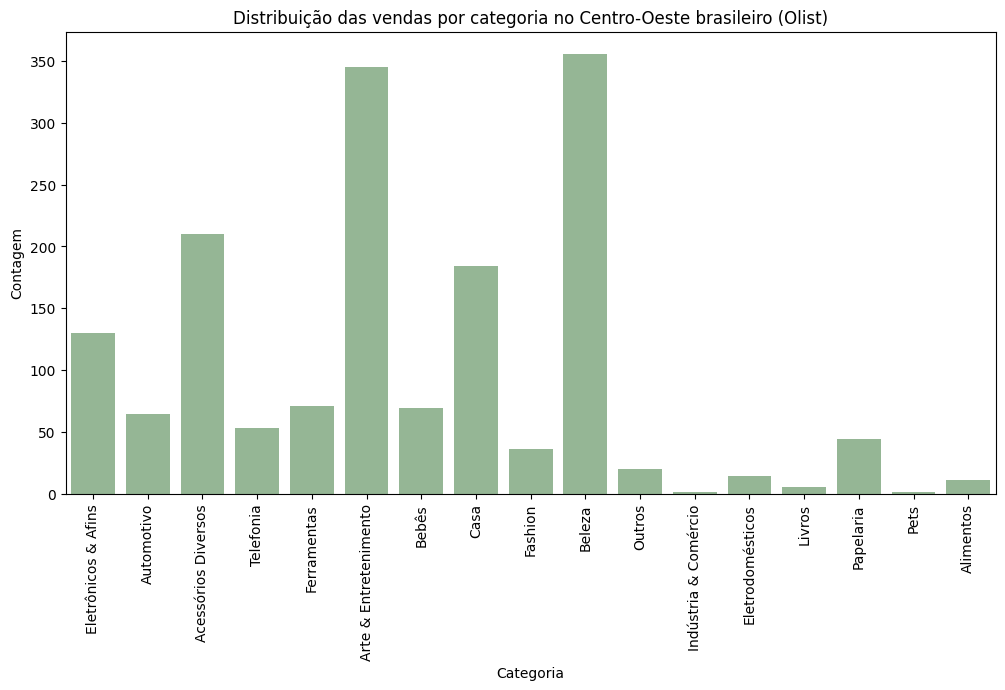

In [152]:
#Limitando o dataframe a itens vendidos somente por vendedores do centro-oeste
df_centro_oeste = df_desafio[df_desafio['seller_region'] == 'Centro-Oeste']

#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_centro_oeste,
              x = 'product_category_name',
              color = 'darkseagreen')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das vendas por categoria no Centro-Oeste brasileiro (Olist)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Rotacionando os textos do eixo x para melhor visualização
plt.xticks(rotation=90)

#Visualizando o gráfico
plt.show()

#### Nordeste

Categoria de produtos mais vendida: **Beleza**

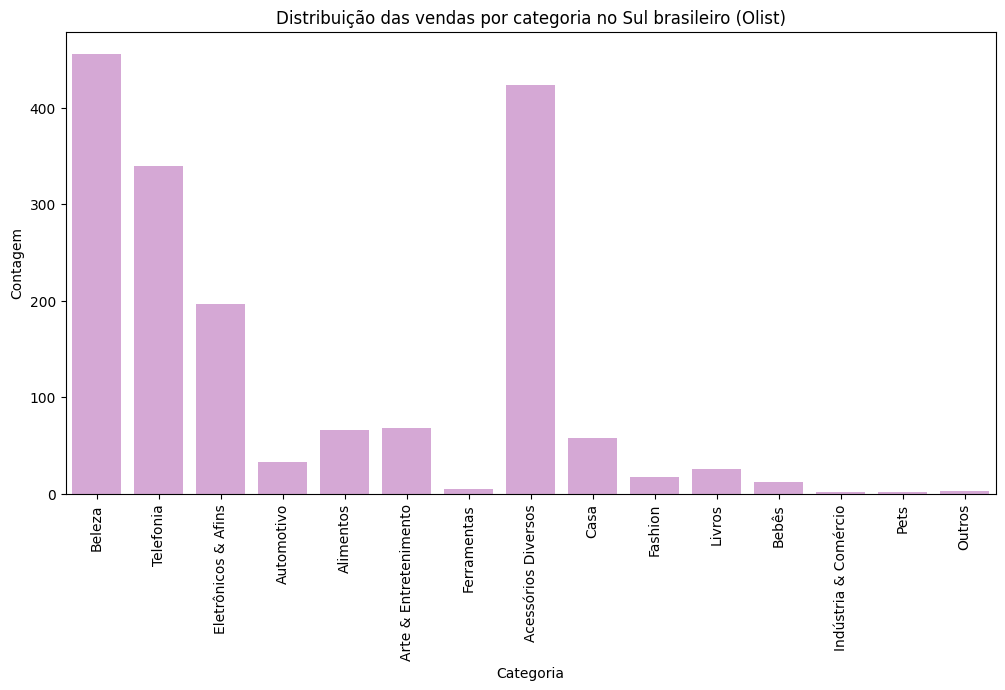

In [153]:
#Limitando o dataframe a itens vendidos somente por vendedores nordestinos
df_nordeste = df_desafio[df_desafio['seller_region'] == 'Nordeste']

#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_nordeste,
              x = 'product_category_name',
              color = 'plum')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das vendas por categoria no Sul brasileiro (Olist)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Rotacionando os textos do eixo x para melhor visualização
plt.xticks(rotation=90)

#Visualizando o gráfico
plt.show()

#### Norte

Categoria de produtos mais vendida: **Automotivo**

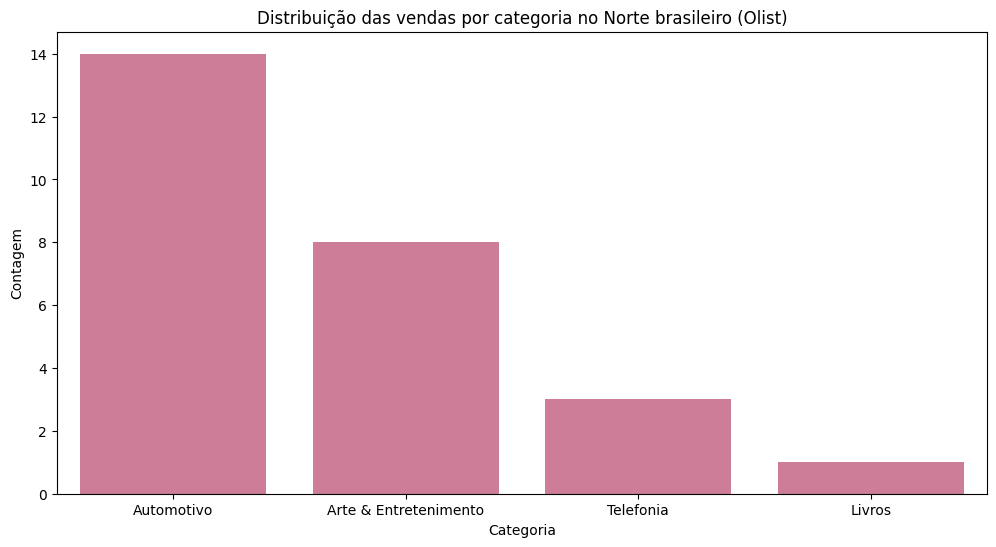

In [154]:
#Limitando o dataframe a itens vendidos somente por vendedores nortistas
df_norte = df_desafio[df_desafio['seller_region'] == 'Norte']

#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Definindo o tipo de plotagem
sns.countplot(data = df_norte,
              x = 'product_category_name',
              color = 'palevioletred')

#Definindo o título e nomeando os eixos
plt.title('Distribuição das vendas por categoria no Norte brasileiro (Olist)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')

#Visualizando o gráfico
plt.show()

### **Qual a média do frete de acordo com a localidade do vendedor?**

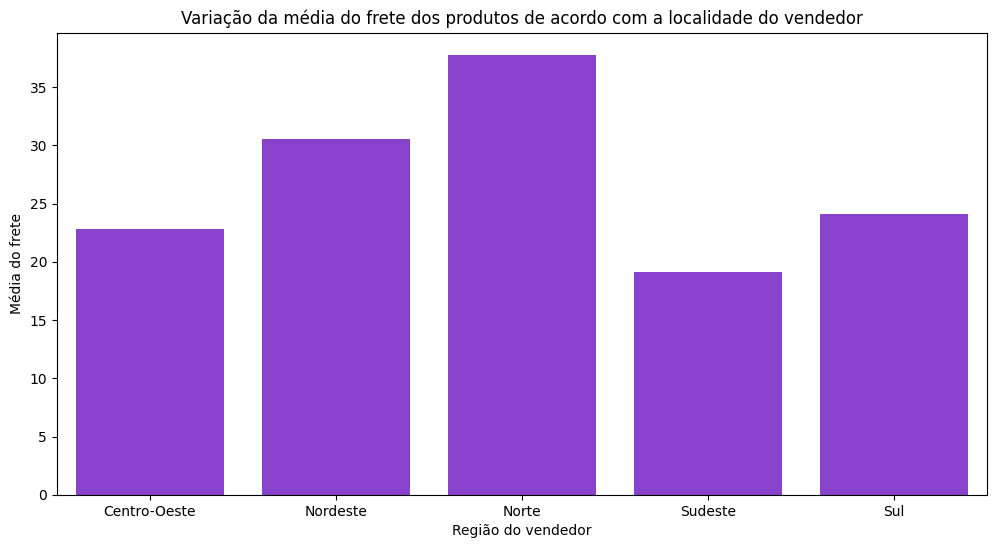

In [160]:
#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Reduzindo o dataframe a ser usado de fonte
df_frete = df_desafio.groupby('seller_region')['freight_value'].mean().reset_index()

#Definindo o tipo de plotagem
sns.barplot(data = df_frete,
            x = 'seller_region',
            y = 'freight_value',
            color = 'blueviolet')

#Definindo o título e nomeando os eixos
plt.title('Variação da média do frete dos produtos de acordo com a localidade do vendedor')
plt.xlabel('Região do vendedor')
plt.ylabel('Média do frete')

#Visualizando o gráfico
plt.show()

É possível notar que, mesmo o valor do frete dependendo também da localidade do consumidor, a média de pagamento por esse serviço é consideravelmente maior para produtos comprados de vendedores das regiões Norte e Nordeste.

### **Qual a variação da média de preço dos produtos vendidos de acordo com a região do vendedor?**

In [162]:
df_desafio.groupby('seller_region')['price'].mean()

seller_region
Centro-Oeste    117.578129
Nordeste        272.520985
Norte           286.315385
Sudeste         112.937131
Sul             152.082490
Name: price, dtype: float64

É possível responder a essa perguntar utilizando somente a função .groupby(), mas é interessante a montagem de um gráfico para a melhor visualização das médias.

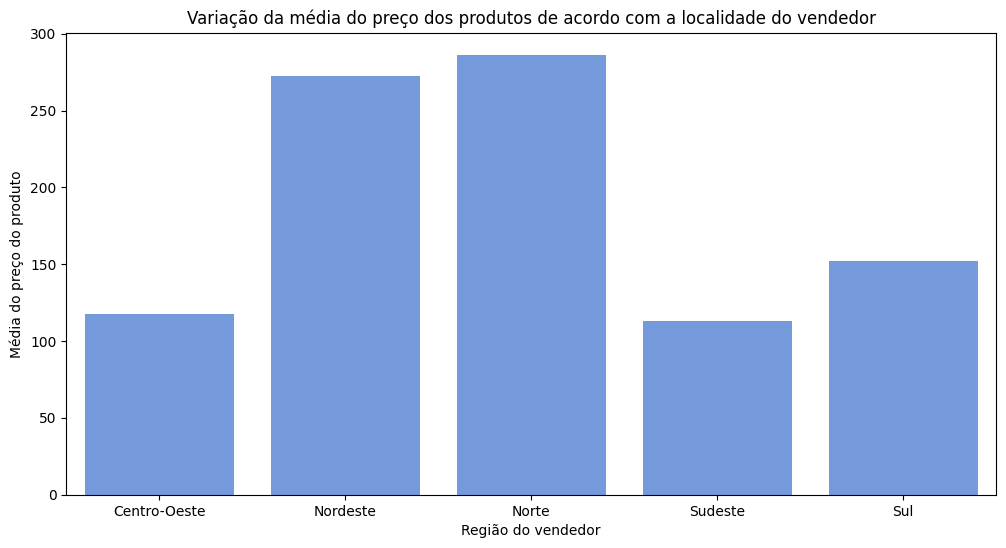

In [163]:
#Definindo o tamanho da figura
plt.figure(figsize=(12, 6))

#Reduzindo o dataframe a ser usado de fonte
df_preco = df_desafio.groupby('seller_region')['price'].mean().reset_index()

#Definindo o tipo de plotagem
sns.barplot(data = df_preco,
            x = 'seller_region',
            y = 'price',
            color = 'cornflowerblue')

#Definindo o título e nomeando os eixos
plt.title('Variação da média do preço dos produtos de acordo com a localidade do vendedor')
plt.xlabel('Região do vendedor')
plt.ylabel('Média do preço do produto')

#Visualizando o gráfico
plt.show()

Mesmo sabendo que a média não é necessariamente um parâmetro de análise extremamente preciso, é possível ver uma espécie de concordância com as duas visualizações mais recentes: talvez o valor de um frete mais alto seja devido ao fato de que as compras feitas de vendedores nortistas/nordestinos também possuam geralmente valores mais altos.